In [23]:
import matplotlib as mpl

fsize = 11
textwidth = 6.47
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (textwidth,(textwidth*9)/16)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import datetime
import re

[( 12,   1,   8297765, 98, [ 5425,  5217,  5425,  5121,  5537])
 ( 12,   2,   8299051, 91, [ 5169,  5569,  5313,  5089,  5505])
 ( 12,   3,   8300128, 91, [ 5217,  5377,  5313,  5409,  5473]) ...
 (250,  98, 196178406, 93, [14771, 14931, 14867, 14803, 14899])
 (250,  99, 196179590, 89, [14819, 14947, 14611, 14931, 14691])
 (250, 100, 196180654, 85, [15043, 14563, 14691, 14995, 14963])]
[7145]


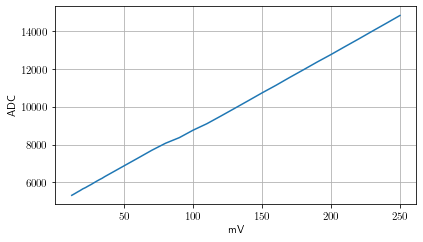

In [24]:
#normal_working_conditions
#pulse_val,e_count,t0[us],dt0[us],readings
data = np.genfromtxt('calibration.txt', delimiter=",", dtype=[('mV', int), ('event', int), ('t0', int), ('dt0', int), ('ADC', np.dtype("(5,)i4"))], usecols=np.arange(0,9), skip_header=1)
#data = np.genfromtxt('calibration.txt', delimiter=",", dtype=[('mV', int), ('event', int)], usecols=[0,1], skip_header=1)
print(data)

adc_avrg = np.zeros_like(data["mV"])

for a, val in enumerate(data["ADC"]):
    adc_avrg[a] = sum(val)/len(val)

dV1 = 2
dV2 = 10
Voltages = np.array(list(range(12, 41, dV1))+list(range(50, 251, dV2)))

ADC_avrg = np.zeros_like(Voltages)

for i in range(len(Voltages)):
    ADC_avrg[i] = sum(adc_avrg[i*100:(i+1)*100])/100

ADC1 = ADC_avrg[Voltages==50]
ADC2 = ADC_avrg[Voltages==50+180]
print(ADC2-ADC1)

plt.xlabel("mV")
plt.ylabel("ADC")

plt.grid()
plt.plot(Voltages, ADC_avrg)